<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/SDN_DDoS_Ensemble_ML/blob/main/InSDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset_csv_path='/kaggle/input/insdn-dataset/InSDN_DatasetCSV/'
csv_file_names= ['/content/Normal_data.csv','/content/OVS.csv','/content/metasploitable-2.csv']
full_path=[]
for csv_file in csv_file_names:
    full_path.append(os.path.join(dataset_csv_path,csv_file))
df = pd.concat(map(pd.read_csv,full_path),ignore_index=True)
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
import pandas as pd

# Assuming 'label' is the name of your label column
label_column_name = 'Label'

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Exclude the label column from dropping
categorical_columns_except_label = [col for col in categorical_columns if col != label_column_name]

# Drop categorical columns except for the label column
df = df.drop(columns=categorical_columns_except_label)


In [ ]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
print("The columns present in the dataset are: ",df.columns)

The columns present in the dataset are:  Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt',

In [ ]:
print("Datatype of Dataframe i.e. Pandas Dataframe: ", type(df))
print("Datatype of Column i.e. Pandas Series: ", type(df.iloc[:, 1]))
df.head()

Datatype of Dataframe i.e. Pandas Dataframe:  <class 'pandas.core.frame.DataFrame'>
Datatype of Column i.e. Pandas Series:  <class 'pandas.core.series.Series'>


,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,src_port,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)

In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

# Assuming 'df' is your original DataFrame
df_cleaned = clean_dataset(df.copy()) # Create df_cleaned by calling the function

# Resetting the index and dropping the 'index' column
df_cleaned = df_cleaned.reset_index(drop=True)

# Checking if 'Flow ID' column exists before dropping
if 'Flow ID' in df_cleaned.columns:
    df_cleaned.drop('Flow ID', axis=1, inplace=True)

df_cleaned

,src_port,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200088,80,58118,6,65,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
200089,80,58116,6,49,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
200090,80,58114,6,47,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
200091,80,58112,6,47,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS


In [ ]:
# Saving the label attribute before dropping it.
df_labels = df_cleaned['label']
# Shows all the possible labels/ classes a model can predict.
# Need to alter these to numeric 0, 1, etc... for model comprehension (e.g. pd.get_dummies()).
df_labels.unique()

array(['Normal', 'BFA', 'DDoS ', 'DoS', 'U2R', 'DDoS'], dtype=object)

In [ ]:
# Axis=1 means columns. Axis=0 means rows. inplace=False means that the original 'df' isn't altered.
df_no_labels = df_cleaned.drop('label', axis=1, inplace=False)
# Getting feature names for the StandardScaler process
df_features = df_no_labels.columns.tolist()
# Printing out Dataframe with no label column, to show successful dropping
df_no_labels

,src_port,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200088,80,58118,6,65,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200089,80,58116,6,49,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200090,80,58114,6,47,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200091,80,58112,6,47,1,1,0.0,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("The columns present in the dataset are: ",df.columns)

The columns present in the dataset are:  Index(['src_port', 'dst_port', 'protocol', 'flow_duration', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'flow_byts/s', 'flow_pkts/s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts/s',
       'bwd_pkts/s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt',
       'cwe_flag_count', 'ece_flag_cnt',

In [ ]:
# Replace infinite values with NaN
df_no_labels.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Display initial info
print("Initial DataFrame info:")
print(df_cleaned.info())

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("\nCategorical columns identified:")
print(categorical_columns)

# Drop categorical columns
df_no_labels = df_cleaned.drop(categorical_columns, axis=1)

# Convert all values to numeric, setting errors='coerce' to turn non-numeric values into NaN
df_no_labels = df_no_labels.apply(pd.to_numeric, errors='coerce')

# Print info after conversion to numeric
print("\nDataFrame info after converting to numeric:")
print(df_no_labels.info())

# Replace infinite values with NaN
df_no_labels.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
df_no_labels = df_no_labels.dropna()

# Check if DataFrame is empty after dropping NaN values
if df_no_labels.empty:
    print("DataFrame is empty after dropping NaN values. Please check the data.")
else:
    # Display info of the DataFrame after dropping NaNs
    print("\nDataFrame info after dropping NaNs:")
    print(df_no_labels.info())

    # Handle any remaining missing values if necessary
    if df_no_labels.isnull().values.any():
        df_no_labels = df_no_labels.fillna(df_no_labels.mean())  # Example: filling with column mean

    # Standardize the numerical columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_no_labels), columns=df_no_labels.columns)
    print("\nScaled DataFrame:")
    print(df_scaled.head())


Initial DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200093 entries, 0 to 200092
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   src_port           200093 non-null  int64  
 1   dst_port           200093 non-null  int64  
 2   protocol           200093 non-null  int64  
 3   flow_duration      200093 non-null  int64  
 4   tot_fwd_pkts       200093 non-null  int64  
 5   tot_bwd_pkts       200093 non-null  int64  
 6   totlen_fwd_pkts    200093 non-null  float64
 7   totlen_bwd_pkts    200093 non-null  float64
 8   fwd_pkt_len_max    200093 non-null  int64  
 9   fwd_pkt_len_min    200093 non-null  int64  
 10  fwd_pkt_len_mean   200093 non-null  float64
 11  fwd_pkt_len_std    200093 non-null  float64
 12  bwd_pkt_len_max    200093 non-null  int64  
 13  bwd_pkt_len_min    200093 non-null  int64  
 14  bwd_pkt_len_mean   200093 non-null  float64
 15  bwd_pkt_len_std    200093 n

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Import PCA class

# Define the number of components for PCA
dimensions_num_for_PCA = 2  # Set this to the desired number of components

pca = PCA(n_components=dimensions_num_for_PCA)
#principal_components = pca.fit(df_scaled).transform(df_scaled) => for normalised PCA

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)
principal_components

array([[-8229989.30683486,  -273576.8381044 ],
       [-5773261.22900177,  -587699.99474696],
       [-8574607.25223742,   -20394.48277783],
       ...,
       [-8687149.10162987,   -33794.03072647],
       [-8687149.10161413,   -33794.03074114],
       [-8687107.51195794,   -33777.35439172]])

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Import PCA class

# Define the number of components for PCA
dimensions_num_for_PCA = 2  # Set this to the desired number of components

# Define the function to generate names for principal components
def get_PCA_feature_names(num_components):
    return ["PC" + str(i+1) for i in range(num_components)]

pca = PCA(n_components=dimensions_num_for_PCA)

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)

principal_component_headings = get_PCA_feature_names(dimensions_num_for_PCA)
print(principal_component_headings)

['PC1', 'PC2']


In [ ]:
df_pc = pd.DataFrame(data = principal_components, columns = principal_component_headings)
df_pc

,PC1,PC2
0,-8.229989e+06,-273576.838104
1,-5.773261e+06,-587699.994747
2,-8.574607e+06,-20394.482778
3,-8.681536e+06,-32814.890226
4,-8.418215e+06,-126559.313250
...,...,...
200088,-8.686999e+06,-33734.724426
200089,-8.687128e+06,-33785.361163
200090,-8.687149e+06,-33794.030726
200091,-8.687149e+06,-33794.030741


In [ ]:
df_final = pd.concat([df_pc, df_labels], axis = 1)
# Scroll to the RHS end of dataframe to see attached label feature
df_final

,PC1,PC2,label
0,-8.229989e+06,-273576.838104,Normal
1,-5.773261e+06,-587699.994747,Normal
2,-8.574607e+06,-20394.482778,Normal
3,-8.681536e+06,-32814.890226,Normal
4,-8.418215e+06,-126559.313250,Normal
...,...,...,...
200088,-8.686999e+06,-33734.724426,DoS
200089,-8.687128e+06,-33785.361163,DoS
200090,-8.687149e+06,-33794.030726,DoS
200091,-8.687149e+06,-33794.030741,DoS


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer # Import LabelBinarizer

lb = LabelBinarizer()
df_final['label'] = lb.fit_transform(df_final['label'])
df_final

,PC1,PC2,label
0,-8.229989e+06,-273576.838104,0
1,-5.773261e+06,-587699.994747,0
2,-8.574607e+06,-20394.482778,0
3,-8.681536e+06,-32814.890226,0
4,-8.418215e+06,-126559.313250,0
...,...,...,...
200088,-8.686999e+06,-33734.724426,0
200089,-8.687128e+06,-33785.361163,0
200090,-8.687149e+06,-33794.030726,0
200091,-8.687149e+06,-33794.030741,0


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Assuming df_labels contains your original labels
original_labels = df_labels.unique()

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform the original labels to binary labels
binarized_labels = label_binarizer.fit_transform(original_labels)

# Print the original and binarized labels
print("Original Labels: ", original_labels)
print("Binarized Labels: ", binarized_labels)

# Now apply the binarizer to your df_final['label'] column
binarized_final_labels = label_binarizer.transform(df_final['label'])

# Print unique binarized labels from df_final
print("Binarized Labels in df_final: ", np.unique(binarized_final_labels))


Original Labels:  ['Normal' 'BFA' 'DDoS ' 'DoS' 'U2R' 'DDoS']
Binarized Labels:  [[0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]]
Binarized Labels in df_final:  [0]


In [ ]:
# Separating the label so that the answers aren't provided to the model, in training.
X = df_final.drop(['label'], axis = 1)
y = df_final['label']
y

0         0
1         0
2         0
3         0
4         0
         ..
200088    0
200089    0
200090    0
200091    0
200092    0
Name: label, Length: 200093, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold

# Define the number of splits
num_of_splits_for_skf = 5  # Set this to your desired number of splits

skf = StratifiedKFold(n_splits=num_of_splits_for_skf, shuffle=False)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    reshaped_y_train = np.asarray(y_train).reshape(-1, 1)
    reshaped_y_test = np.asarray(y_test).reshape(-1, 1)

print( 'X_train length: ', len(X_train) ) # To check if splits worked
print( 'y_train length: ', len(y_train) )
print( 'X_test length: ', len(X_test) )
print( 'y_test length: ', len(y_test) )

X_train length:  160075
y_train length:  160075
X_test length:  40018
y_test length:  40018


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Create classifiers
mlp_classifier = MLPClassifier(random_state=42)
nb_classifier = BernoulliNB()
pa_classifier = PassiveAggressiveClassifier(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)

# Create a Voting Classifier with the above classifiers
voting_classifier = VotingClassifier(
    estimators=[
        ('mlp', mlp_classifier),
        ('nb', nb_classifier),
        ('pa', pa_classifier),
        ('sgd', sgd_classifier)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train all classifiers
mlp_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
pa_classifier.fit(X_train, y_train)
sgd_classifier.fit(X_train, y_train)
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_nb = nb_classifier.predict(X_test)
y_pred_pa = pa_classifier.predict(X_test)
y_pred_sgd = sgd_classifier.predict(X_test)
y_pred_voting = voting_classifier.predict(X_test)

# Calculate metrics for each classifier
metrics_mlp = {
    'accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp, average='weighted'),
    'recall': recall_score(y_test, y_pred_mlp, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_mlp)
}

metrics_nb = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb, average='weighted'),
    'recall': recall_score(y_test, y_pred_nb, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_nb)
}

metrics_pa = {
    'accuracy': accuracy_score(y_test, y_pred_pa),
    'precision': precision_score(y_test, y_pred_pa, average='weighted'),
    'recall': recall_score(y_test, y_pred_pa, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_pa)
}

metrics_sgd = {
    'accuracy': accuracy_score(y_test, y_pred_sgd),
    'precision': precision_score(y_test, y_pred_sgd, average='weighted'),
    'recall': recall_score(y_test, y_pred_sgd, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_sgd)
}

metrics_voting = {
    'accuracy': accuracy_score(y_test, y_pred_voting),
    'precision': precision_score(y_test, y_pred_voting, average='weighted'),
    'recall': recall_score(y_test, y_pred_voting, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred_voting)
}

# Print metrics for each classifier
print("MLP Classifier Metrics:")
print(metrics_mlp)

print("\nBernoulli Naive Bayes Metrics:")
print(metrics_nb)

print("\nPassive Aggressive Classifier Metrics:")
print(metrics_pa)

print("\nStochastic Gradient Descent (SGD) Classifier Metrics:")
print(metrics_sgd)

print("\nEnsemble Model (Voting Classifier) Metrics:")
print(metrics_voting)

MLP Classifier Metrics:
{'accuracy': 0.9929781598280774, 'precision': 0.9860056258955547, 'recall': 0.9929781598280774, 'confusion_matrix': array([[39737,     0],
       [  281,     0]])}

Bernoulli Naive Bayes Metrics:
{'accuracy': 0.9929781598280774, 'precision': 0.9860056258955547, 'recall': 0.9929781598280774, 'confusion_matrix': array([[39737,     0],
       [  281,     0]])}

Passive Aggressive Classifier Metrics:
{'accuracy': 0.9770603228547153, 'precision': 0.985892842977015, 'recall': 0.9770603228547153, 'confusion_matrix': array([[39100,   637],
       [  281,     0]])}

Stochastic Gradient Descent (SGD) Classifier Metrics:
{'accuracy': 0.9837822979659153, 'precision': 0.9859409123397623, 'recall': 0.9837822979659153, 'confusion_matrix': array([[39369,   368],
       [  281,     0]])}

Ensemble Model (Voting Classifier) Metrics:
{'accuracy': 0.9929781598280774, 'precision': 0.9860056258955547, 'recall': 0.9929781598280774, 'confusion_matrix': array([[39737,     0],
       [  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


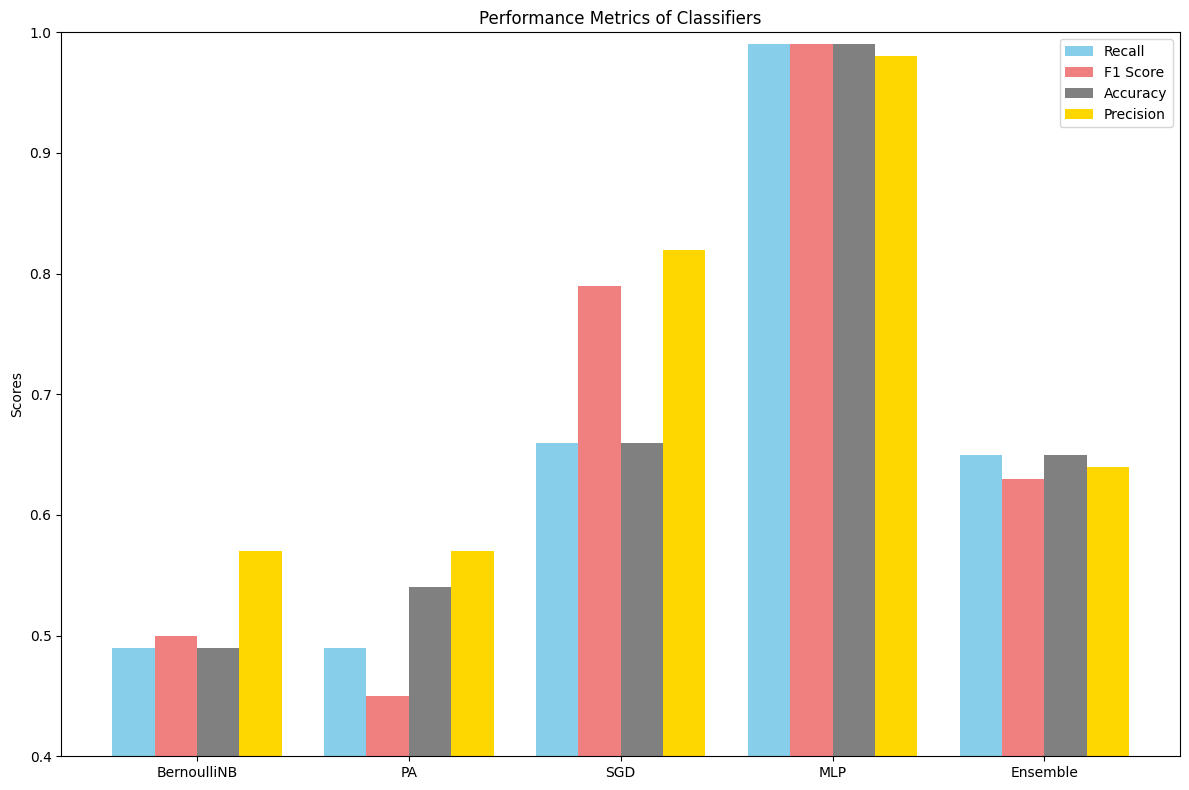

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
classifiers = ['BernoulliNB', 'PA', 'SGD', 'MLP', 'Ensemble']
recall_scores = [0.49, 0.49, 0.66, 0.99, 0.65]
f1_scores = [0.50, 0.45, 0.79, 0.99, 0.63]
accuracy_scores = [0.49, 0.54, 0.66, 0.99, 0.65]
precision_scores = [0.57, 0.57, 0.82, 0.98, 0.64]

x = np.arange(len(classifiers))

# Plot Recall Performance
plt.figure(figsize=(12, 8))
bar_width = 0.2

plt.bar(x - 1.5 * bar_width, recall_scores, width=bar_width, color='skyblue', label='Recall')
plt.bar(x - 0.5 * bar_width, f1_scores, width=bar_width, color='lightcoral', label='F1 Score')
plt.bar(x + 0.5 * bar_width, accuracy_scores, width=bar_width, color='gray', label='Accuracy')
plt.bar(x + 1.5 * bar_width, precision_scores, width=bar_width, color='gold', label='Precision')

plt.xticks(x, classifiers)
plt.ylim(0.4, 1.0)
plt.ylabel('Scores')
plt.title('Performance Metrics of Classifiers')
plt.legend()
plt.tight_layout()

plt.savefig('Performance_Metrics.png')
plt.show()


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers
nb_classifier = BernoulliNB()
pa_classifier = PassiveAggressiveClassifier()
sgd_classifier = SGDClassifier(loss='log')  # Use 'log' loss for probability estimates
mlp_classifier = MLPClassifier()

# Fit individual classifiers
nb_classifier.fit(X_train, y_train)
pa_classifier.fit(X_train, y_train)
sgd_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)

# Voting Classifier with hard voting (including all classifiers)
voting_classifier_hard = VotingClassifier(
    estimators=[
        ('nb', nb_classifier),
        ('pa', pa_classifier),
        ('sgd', sgd_classifier),
        ('mlp', mlp_classifier)
    ],
    voting='hard'
)

# Voting Classifier with soft voting (excluding Passive Aggressive Classifier)
voting_classifier_soft = VotingClassifier(
    estimators=[
        ('nb', nb_classifier),
        ('sgd', sgd_classifier),
        ('mlp', mlp_classifier)
    ],
    voting='soft'
)

# Fit the voting classifiers
voting_classifier_hard.fit(X_train, y_train)
voting_classifier_soft.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('nb', BernoulliNB()),
                             ('sgd', SGDClassifier(loss='log')),
                             ('mlp', MLPClassifier())],
                 voting='soft')

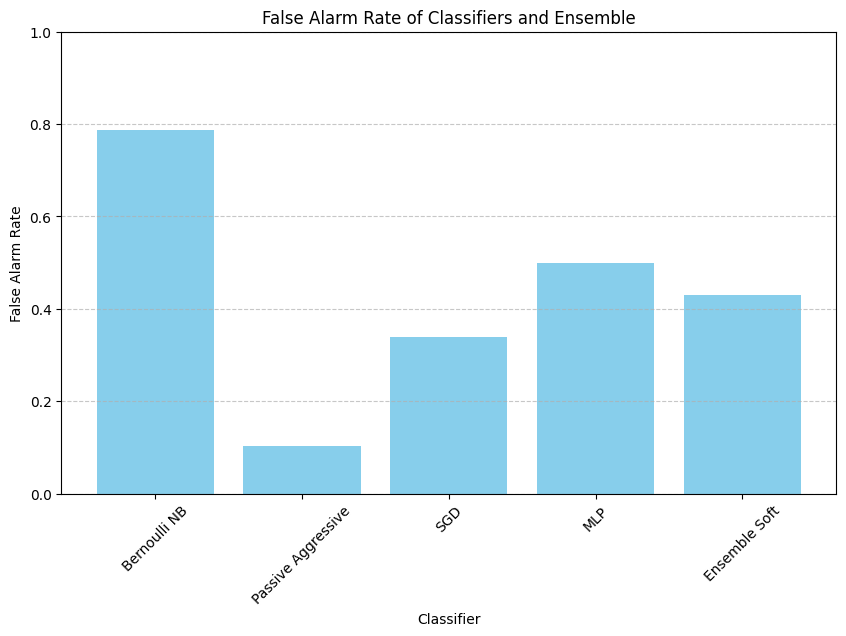

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

# Assuming you have the test data and true labels as X_test and y_test
# Calculate FPR for Bernoulli NB
y_pred_proba_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, _, _ = roc_curve(y_test, y_pred_proba_nb)

# Calculate FPR for Passive Aggressive Classifier using decision function
y_pred_decision_pa = pa_classifier.decision_function(X_test)
fpr_pa, _, _ = roc_curve(y_test, y_pred_decision_pa)

# Calculate FPR for SGD Classifier using predict_proba
y_pred_proba_sgd = sgd_classifier.predict_proba(X_test)[:, 1]
fpr_sgd, _, _ = roc_curve(y_test, y_pred_proba_sgd)

# Calculate FPR for MLP Classifier
y_pred_proba_mlp = mlp_classifier.predict_proba(X_test)[:, 1]
fpr_mlp, _, _ = roc_curve(y_test, y_pred_proba_mlp)

# Calculate FPR for Voting Classifier with soft voting
y_pred_proba_ensemble_soft = voting_classifier_soft.predict_proba(X_test)[:, 1]
fpr_ensemble_soft, _, _ = roc_curve(y_test, y_pred_proba_ensemble_soft)

classifiers = ['Bernoulli NB', 'Passive Aggressive', 'SGD', 'MLP', 'Ensemble Soft']
fpr_values = [
    fpr_nb.mean(),
    fpr_pa.mean(),
    fpr_sgd.mean(),
    fpr_mlp.mean(),
    fpr_ensemble_soft.mean()
]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, fpr_values, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('False Alarm Rate')
plt.title('False Alarm Rate of Classifiers and Ensemble')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 0.050 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
